In [175]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [176]:
data = pd.read_csv('../data/average-real-gdp-per-capita-across-countries-and-regions.csv')

data

,Entity,Code,Year,GDP per capita (int.-$) ($)
0,Afghanistan,AFG,1950,2392
1,Afghanistan,AFG,1951,2422
2,Afghanistan,AFG,1952,2462
3,Afghanistan,AFG,1953,2568
4,Afghanistan,AFG,1954,2576
...,...,...,...,...
18197,Zimbabwe,ZWE,2012,1623
18198,Zimbabwe,ZWE,2013,1801
18199,Zimbabwe,ZWE,2014,1797
18200,Zimbabwe,ZWE,2015,1759


In [177]:
data.reset_index()

,index,Entity,Code,Year,GDP per capita (int.-$) ($)
0,0,Afghanistan,AFG,1950,2392
1,1,Afghanistan,AFG,1951,2422
2,2,Afghanistan,AFG,1952,2462
3,3,Afghanistan,AFG,1953,2568
4,4,Afghanistan,AFG,1954,2576
...,...,...,...,...,...
18197,18197,Zimbabwe,ZWE,2012,1623
18198,18198,Zimbabwe,ZWE,2013,1801
18199,18199,Zimbabwe,ZWE,2014,1797
18200,18200,Zimbabwe,ZWE,2015,1759


In [178]:
engine = create_engine('mysql+pymysql://root@localhost/project-week-6')

In [179]:
data.to_sql('average_gdp_per_capita', engine, if_exists='replace', index=False)

In [180]:
data = pd.read_sql('SELECT * FROM average_gdp_per_capita', engine)

data

,Entity,Code,Year,GDP per capita (int.-$) ($)
0,Afghanistan,AFG,1950,2392
1,Afghanistan,AFG,1951,2422
2,Afghanistan,AFG,1952,2462
3,Afghanistan,AFG,1953,2568
4,Afghanistan,AFG,1954,2576
...,...,...,...,...
18197,Zimbabwe,ZWE,2012,1623
18198,Zimbabwe,ZWE,2013,1801
18199,Zimbabwe,ZWE,2014,1797
18200,Zimbabwe,ZWE,2015,1759


In [181]:
groupby_data = data.groupby('Entity')

In [182]:
year2016_data = data.loc[data['Year'] == 2016]

year2016_data = year2016_data.dropna()

year2016_data = year2016_data.sort_values(by='GDP per capita (int.-$) ($)', ascending=False)

year2016_data

,Entity,Code,Year,GDP per capita (int.-$) ($)
13092,Qatar,QAT,2016,139783
11278,Norway,NOR,2016,76397
16582,United Arab Emirates,ARE,2016,70284
8997,Luxembourg,LUX,2016,69057
8359,Kuwait,KWT,2016,67798
...,...,...,...,...
10954,Niger,NER,2016,906
3687,Democratic Republic of Congo,COD,2016,836
8825,Liberia,LBR,2016,764
1990,Burundi,BDI,2016,692


In [183]:
germany = groupby_data.get_group('Germany')

netherlands = groupby_data.get_group('Netherlands')

norway = groupby_data.get_group('Norway')

south_korea = groupby_data.get_group('South Korea')

united_states = groupby_data.get_group('United States')

In [184]:
width_plot = 1280
height_plot = 720
opacity_traces = 0.8
opacity_shapes = 0.1
war_color = 'red'
financial_color = 'green'

In [211]:
fig = px.histogram(year2016_data, x='Entity', y='GDP per capita (int.-$) ($)')

# fig.update_yaxes(range=[0, 70000])

fig.update_layout(width=width_plot, height=height_plot, title='Plot Title', xaxis_title='X Axis Title', yaxis_title='X Axis Title', showlegend=True, legend_title='Legend Title')

# fig.write_image("../plots/leilani_mitchell/leilani_mitchell_stats.png")

fig.show()

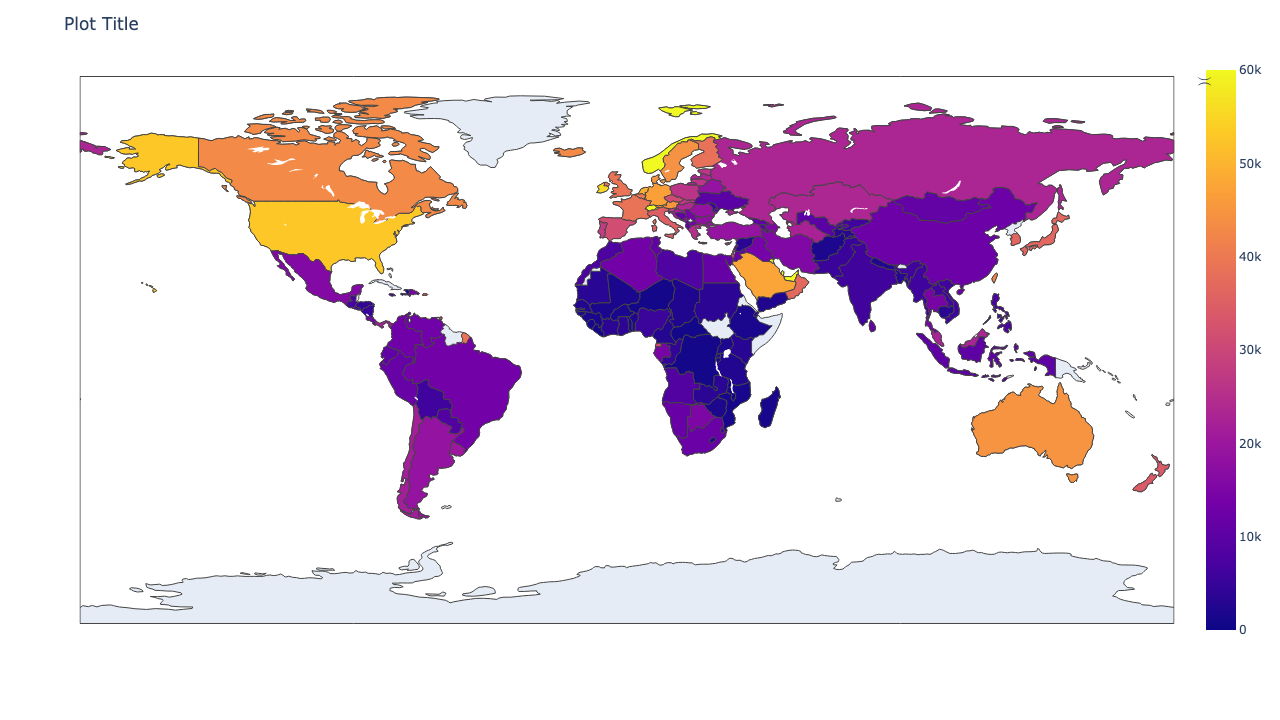

In [220]:
fig = px.choropleth(year2016_data, locations="Code",
                    hover_name="Entity",
                    color="GDP per capita (int.-$) ($)",
                    range_color=[0,60000],
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(width=width_plot, height=height_plot, title='Plot Title', showlegend=True)

fig.show(renderer="png", width=width_plot, height=height_plot)

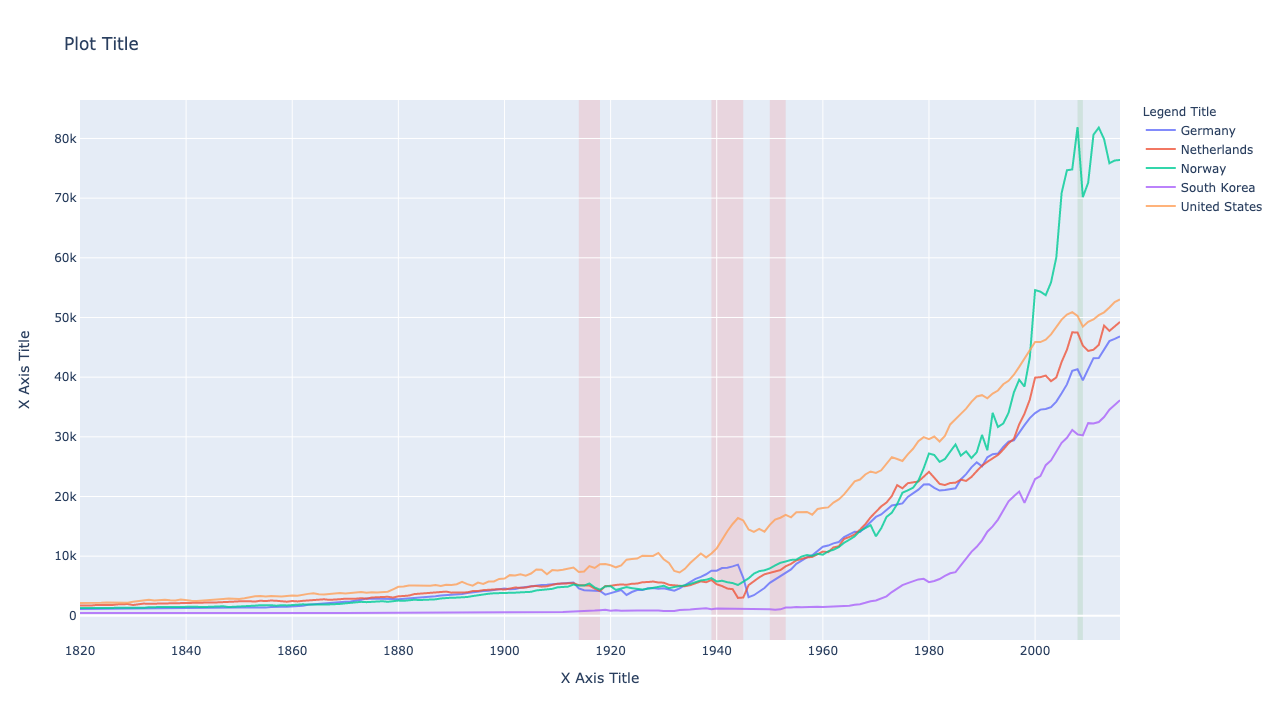

In [210]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = germany['Year'],
    y = germany['GDP per capita (int.-$) ($)'],
    name='Germany',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = netherlands['Year'],
    y = netherlands['GDP per capita (int.-$) ($)'],
    name='Netherlands',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = norway['Year'],
    y = norway['GDP per capita (int.-$) ($)'],
    name='Norway',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = south_korea['Year'],
    y = south_korea['GDP per capita (int.-$) ($)'],
    name='South Korea',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = united_states['Year'],
    y = united_states['GDP per capita (int.-$) ($)'],
    name='United States',
    opacity=opacity_traces
))

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1914',
            y0=0,
            x1='1918',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1939',
            y0=0,
            x1='1945',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1950',
            y0=0,
            x1='1953',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2008',
            y0=0,
            x1='2009',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
        ),
    ]
)

fig.update_xaxes(range=[1820, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='Plot Title', xaxis_title='X Axis Title', yaxis_title='X Axis Title', showlegend=True, legend_title='Legend Title')

# fig.write_image("../plots/leilani_mitchell/leilani_mitchell_stats.png")

fig.show(renderer="png", width=width_plot, height=height_plot)

In [188]:
brazil = groupby_data.get_group('Brazil')

china = groupby_data.get_group('China')

india = groupby_data.get_group('India')

russia = groupby_data.get_group('Russia')

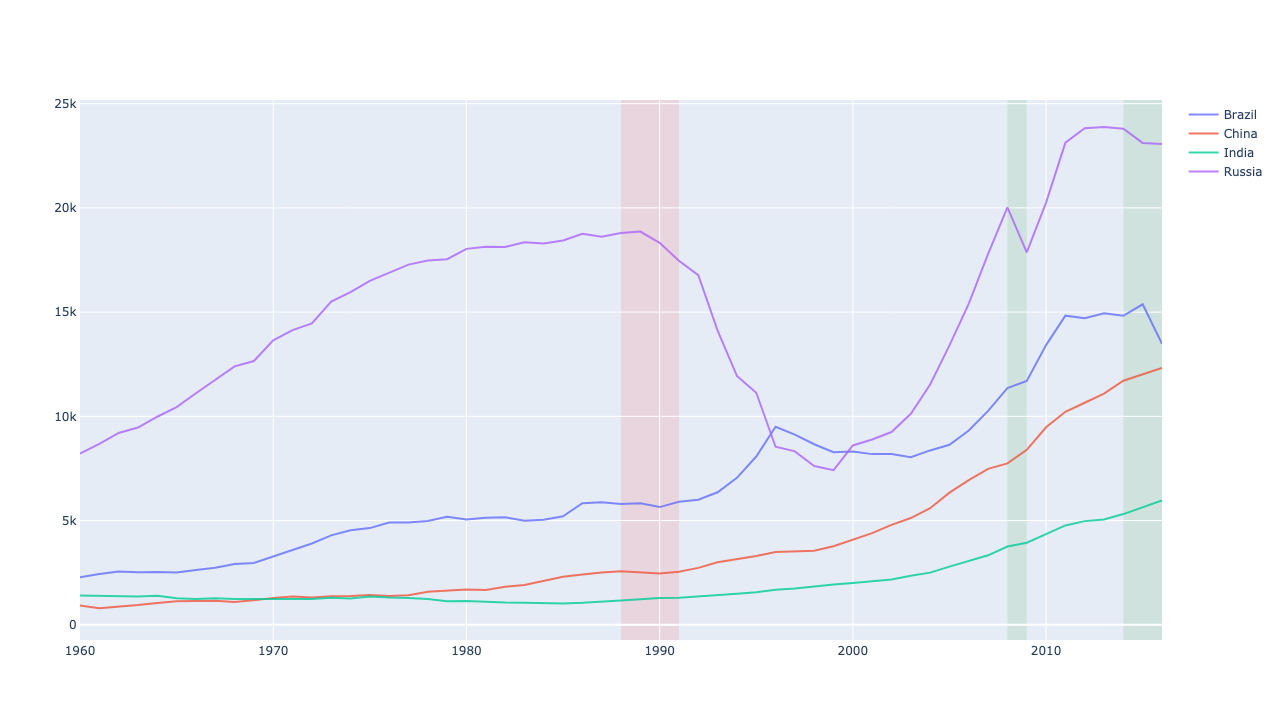

In [189]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = brazil['Year'],
    y = brazil['GDP per capita (int.-$) ($)'],
    name='Brazil',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = china['Year'],
    y = china['GDP per capita (int.-$) ($)'],
    name='China',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = india['Year'],
    y = india['GDP per capita (int.-$) ($)'],
    name='India',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = russia['Year'],
    y = russia['GDP per capita (int.-$) ($)'],
    name='Russia',
    opacity=opacity_traces
))

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1988',
            y0=0,
            x1='1991',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2008',
            y0=0,
            x1='2009',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2014',
            y0=0,
            x1='2016',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
        ),
    ]
)

fig.update_xaxes(range=[1960, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='Plot Title', xaxis_title='X Axis Title', yaxis_title='X Axis Title', showlegend=True, legend_title='Legend Title')

# fig.write_image("../plots/leilani_mitchell/leilani_mitchell_stats.png")

fig.show(renderer="png", width=width_plot, height=height_plot)

In [190]:
brazil = groupby_data.get_group('Africa')

china = groupby_data.get_group('China')

india = groupby_data.get_group('India')

russia = groupby_data.get_group('Russia')

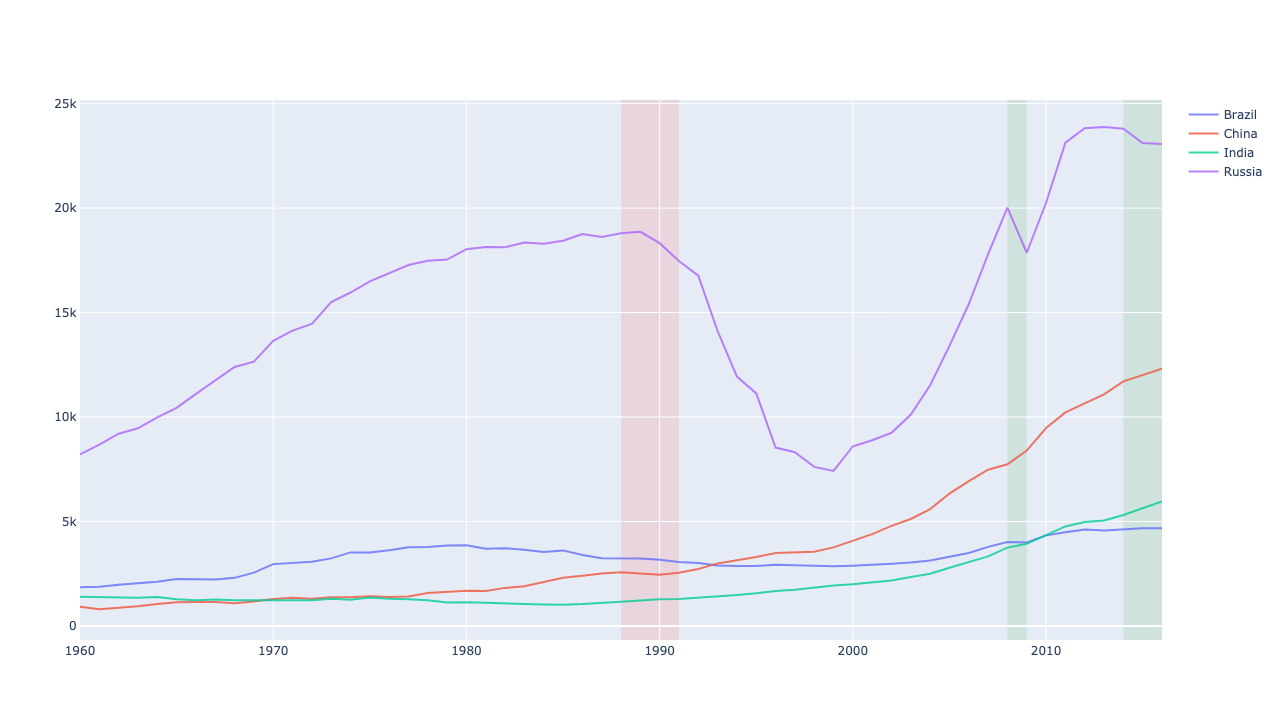

In [191]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = brazil['Year'],
    y = brazil['GDP per capita (int.-$) ($)'],
    name='Brazil',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = china['Year'],
    y = china['GDP per capita (int.-$) ($)'],
    name='China',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = india['Year'],
    y = india['GDP per capita (int.-$) ($)'],
    name='India',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = russia['Year'],
    y = russia['GDP per capita (int.-$) ($)'],
    name='Russia',
    opacity=opacity_traces
))

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1988',
            y0=0,
            x1='1991',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2008',
            y0=0,
            x1='2009',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2014',
            y0=0,
            x1='2016',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
        ),
    ]
)

fig.update_xaxes(range=[1960, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='Plot Title', xaxis_title='X Axis Title', yaxis_title='X Axis Title', showlegend=True, legend_title='Legend Title')

# fig.write_image("../plots/leilani_mitchell/leilani_mitchell_stats.png")

fig.show(renderer="png", width=width_plot, height=height_plot)